# Jupyter Notebook - Music Demos

This build incorporates a range of Python packages that can be used to support the creation of rich, interactive materials relating to music.

##  The Linux `lilypond` Package

Python packags such as `abjad` and `music21` both wrap Lilypond to generate music scores from a higher level representation, but we can also write musical scores using Lilypond directly.

In [12]:
import os
from IPython.display import Image

def lp(score):
    with open("test.ly", "w") as out_file:
        out_file.write(score)
    os.system( "lilypond -dbackend=eps -dno-gs-load-fonts -dinclude-eps-fonts --png test.ly" )
    return Image(filename='test.png')

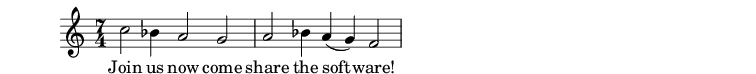

In [13]:
score=r'''
\version "2.18.2"
\header { 
  tagline = ""  % removed 
} 

  \relative c'' {
    \time 7/4
    c2 bes4 a2 g a bes4 a( g) f2
  }
  \addlyrics {
    Join us now come share the soft -- ware!
  }

'''

lp(score)

## `music21`

The `music21` package is a [toolkit for musicology](http://web.mit.edu/music21/).

The toolkit can be used to display notation defined in a variety of ways.

In [5]:
#The setting of environment variables and the display of notation is borked on Linux
#Use crappy workarounds for now - or perhaps try a conda install?
from music21 import *


environment.UserSettings()['lilypondPath']='/usr/bin/lilypond'
environment.set('pdfPath', '/usr/bin/musescore')
environment.set('graphicsPath', '/usr/bin/musescore')
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
environment.set("musicxmlPath", "/usr/bin/musescore")

%load_ext music21.ipython21

from IPython.display import Image

def render(s):
    s.show('lily.png')
    return Image(filename=s.write('lily.png'))

The music21.ipython21 extension is already loaded. To reload it, use:
  %reload_ext music21.ipython21


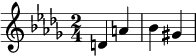

In [6]:
m1 = stream.Measure()
m1.timeSignature = meter.TimeSignature('2/4')
m1.keySignature = key.KeySignature(-5)
m1.append([note.Note('D'), note.Note('A')])
m2 = stream.Measure()
m2.append([note.Note('B-'), note.Note('G#')])
p = stream.Part()
p.append([m1, m2])
render(p)

### TinyNotation

In [7]:
def tiny(t):
    return render( converter.parse('tinyNotation: {}'.format(t)) )

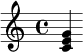

In [8]:
c = chord.Chord("C4 E4 G4")
c.isConsonant()
c.show('lily.png')
Image(filename=c.write('lily.png'))

We can also provide an audio rendering of the score.

In [15]:
c.show('midi')

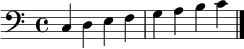

In [9]:
from music21 import converter
s = converter.parse('tinyNotation: 4/4 C4 D4 E4 F4 G4 A4 B4 c4')
render(s)

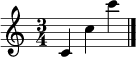

In [10]:
tiny("3/4 c4 c'4 c''4")

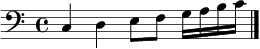

In [11]:
tiny('4/4 C4 D E8 F G16 A B c')

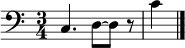

In [12]:
tiny('3/4 C.4 D8~ D8 r c4')

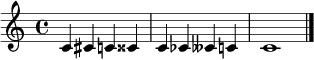

In [13]:
tiny('4/4 c4 c# c c## cn c- c-- c c1')

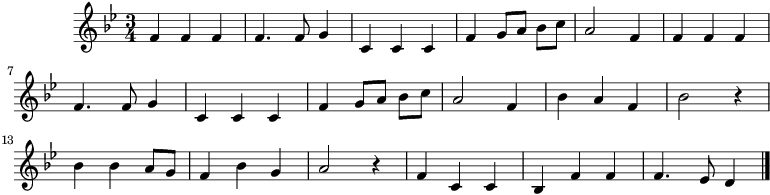

In [16]:
myBach = corpus.parse('bach/bwv57.8')
alto = myBach.parts['Alto']

render(alto)

Once again, we can listen to the score by converting it to a MIDI file and then playing that file through an audio player.

In [17]:
alto.show('midi')